# Problem Statement

# All bank branches across India provide MUDRA loans. Such loans have created the low-cost credit concept for micro and small businesses. One of the leading financial institutions in India wants to leverage Machine Learning techniques to determine the client’s loan repayment abilities and take proactive steps to reduce the magnitude of exposure to default. 



# Goal: The goal of the problem is to predict whether a client will default on the loan payment or not, given the recent data of all the loan transactions. This can help the institution to distinguish future applicants who might default. For each ID in the Test Dataset, you must predict the “Default” level.

In [208]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [209]:
train_data  = pd.read_csv('D:/Wilson Analytics -Mega Hackathon_Dec2022/training_data.csv')

In [210]:
# train_data.head()

In [211]:
# train_data.tail()

In [212]:
train_data.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan',
       'Borrower_Name ', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees',
       'Classification_Code ', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Loan_Term', 'Commitment_Date',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line', 'Default'],
      dtype='object')

In [213]:
# train_data['Primary_Loan_Digit'].value_counts()

In [214]:
train_data = train_data.drop(['ID', 'Date_Of_Disbursement', 
       'Year_Of_Commitment ', 'Borrower_Name ', 'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Classification_Code ', 'Commitment_Date',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank'],axis=1)

In [215]:
train_data.shape

(105000, 12)

In [216]:
train_data.isnull().sum()

Business                      15
Jobs_Reatained                 0
Jobs_Created                   0
Guaranteed_Approved _Loan      0
Low_Documentation_Loan       367
Demography                     0
Count_Employees                0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Revolving_Credit_Line        491
Default                        0
dtype: int64

In [217]:
train_data['Business'] = train_data['Business'].fillna(train_data['Business'].mode()[0],axis=0)
train_data['Low_Documentation_Loan'] = train_data['Low_Documentation_Loan'].fillna(train_data['Low_Documentation_Loan'].mode()[0],axis=0)
train_data['Revolving_Credit_Line'] = train_data['Revolving_Credit_Line'].fillna(train_data['Revolving_Credit_Line'].mode()[0],axis=0)

In [218]:
train_data['Loan_Term'] = np.where(train_data['Loan_Term'] == 0, train_data['Loan_Term'].mode()[0],train_data['Loan_Term'])

In [219]:
train_data['Loan_Term'].mode()[0]

126

In [220]:
# train_data.head(20)

In [221]:
train_data.isnull().sum()

Business                     0
Jobs_Reatained               0
Jobs_Created                 0
Guaranteed_Approved _Loan    0
Low_Documentation_Loan       0
Demography                   0
Count_Employees              0
Loan_Approved_Gross          0
Gross_Amount_Disbursed       0
Loan_Term                    0
Revolving_Credit_Line        0
Default                      0
dtype: int64

In [222]:
# train_data.dropna(inplace=True)

In [223]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Business                   105000 non-null  object
 1   Jobs_Reatained             105000 non-null  int64 
 2   Jobs_Created               105000 non-null  int64 
 3   Guaranteed_Approved _Loan  105000 non-null  object
 4   Low_Documentation_Loan     105000 non-null  object
 5   Demography                 105000 non-null  object
 6   Count_Employees            105000 non-null  int64 
 7   Loan_Approved_Gross        105000 non-null  object
 8   Gross_Amount_Disbursed     105000 non-null  object
 9   Loan_Term                  105000 non-null  int64 
 10  Revolving_Credit_Line      105000 non-null  object
 11  Default                    105000 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 9.6+ MB


In [224]:
df_num = train_data.select_dtypes(include='int64')
df_num.head()

,Jobs_Reatained,Jobs_Created,Count_Employees,Loan_Term,Default
0,0,0,38,126,0
1,0,6,6,123,1
2,4,0,4,90,0
3,9,1,7,126,0
4,4,0,4,104,1


In [225]:
df_cat = train_data.select_dtypes(include='object')
df_cat.head()

,Business,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,Loan_Approved_Gross,Gross_Amount_Disbursed,Revolving_Credit_Line
0,Existing,Rs.33121600.0,No,Undefined,Rs.40640000.0,Rs.40640000.0,No
1,New,Rs.32735520.0,No,Urban,Rs.43647360.0,Rs.43647360.0,0
2,Existing,Rs.1422400.0,No,Urban,Rs.2844800.0,Rs.5961400.32,Yes
3,New,Rs.2032000.0,No,Urban,Rs.4064000.0,Rs.4064000.0,Yes
4,Existing,Rs.22981920.0,No,Urban,Rs.30642560.0,Rs.30642560.0,0


In [226]:
df_cat.columns

Index(['Business', 'Guaranteed_Approved _Loan', 'Low_Documentation_Loan',
       'Demography', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ',
       'Revolving_Credit_Line'],
      dtype='object')

In [227]:
df_num['Guaranteed_Approved _Loan'] = df_cat['Guaranteed_Approved _Loan'].str.replace('Rs.','').astype('float')
#df_num['ChargedOff_Amount '] = df_cat['ChargedOff_Amount '].str.replace(',','').str.replace('Rs.','').astype('float')
#df_num['Gross_Amount_Balance'] = df_cat['Gross_Amount_Balance'].str.replace(',','').str.replace('Rs.','').astype('float')
df_num['Loan_Approved_Gross'] = df_cat['Loan_Approved_Gross'].str.replace(',','').str.replace('Rs.','').astype('float')
df_num['Gross_Amount_Disbursed  '] = df_cat['Gross_Amount_Disbursed  '].str.replace(',','').str.replace('Rs.','').astype('float')

In [228]:
# df_num.head()

In [229]:
df_cat = df_cat.drop(['Guaranteed_Approved _Loan','Loan_Approved_Gross','Gross_Amount_Disbursed  '],axis=1)
#df_cat = df_cat.drop(['Gross_Amount_Disbursed  '],axis=1)

In [230]:
df_cat = df_cat.select_dtypes(include='object')
df_cat.head()

,Business,Low_Documentation_Loan,Demography,Revolving_Credit_Line
0,Existing,No,Undefined,No
1,New,No,Urban,0
2,Existing,No,Urban,Yes
3,New,No,Urban,Yes
4,Existing,No,Urban,0


In [231]:
# df_cat.info()

In [232]:
# train_data.describe().T

In [233]:
# for column in df_cat.columns:
#     #if df_LinReg[column].dtype == 'object':
#     print(column.upper(),': ',df_cat[column].nunique())
#     print(df_cat[column].value_counts().sort_values())
#     print('\n')

In [234]:
# df_cat.columns

In [235]:
df_cat['Business']=np.where(df_cat['Business'] =='0', 'Existing', df_cat['Business'])

In [236]:
df_cat['Low_Documentation_Loan']=np.where(df_cat['Low_Documentation_Loan'] =='R' , 'Yes', df_cat['Low_Documentation_Loan'])
df_cat['Low_Documentation_Loan']=np.where(df_cat['Low_Documentation_Loan'] =='A' , 'Yes', df_cat['Low_Documentation_Loan'])
df_cat['Low_Documentation_Loan']=np.where(df_cat['Low_Documentation_Loan'] =='C' , 'Yes', df_cat['Low_Documentation_Loan'])
df_cat['Low_Documentation_Loan']=np.where(df_cat['Low_Documentation_Loan'] =='S' , 'Yes', df_cat['Low_Documentation_Loan'])
df_cat['Low_Documentation_Loan']=np.where(df_cat['Low_Documentation_Loan'] =='0' , 'Yes', df_cat['Low_Documentation_Loan'])

In [237]:
df_cat['Demography'] = np.where(df_cat['Demography'] =='Undefined', 'Urban', df_cat['Demography'])

In [238]:
df_cat['Revolving_Credit_Line'] = np.where(df_cat['Revolving_Credit_Line'] == '2', 'No',df_cat['Revolving_Credit_Line'])
df_cat['Revolving_Credit_Line'] = np.where(df_cat['Revolving_Credit_Line'] == '4', 'No',df_cat['Revolving_Credit_Line'])
df_cat['Revolving_Credit_Line'] = np.where(df_cat['Revolving_Credit_Line'] == '.', 'No',df_cat['Revolving_Credit_Line'])
df_cat['Revolving_Credit_Line'] = np.where(df_cat['Revolving_Credit_Line'] == 'C', 'No',df_cat['Revolving_Credit_Line'])
df_cat['Revolving_Credit_Line'] = np.where(df_cat['Revolving_Credit_Line'] == '1', 'No', df_cat['Revolving_Credit_Line'])
df_cat['Revolving_Credit_Line'] = np.where(df_cat['Revolving_Credit_Line'] == 'R', 'No',df_cat['Revolving_Credit_Line'])
df_cat['Revolving_Credit_Line'] = np.where(df_cat['Revolving_Credit_Line'] == 'T', 'No',df_cat['Revolving_Credit_Line'])
df_cat['Revolving_Credit_Line'] = np.where(df_cat['Revolving_Credit_Line'] == '`', 'No',df_cat['Revolving_Credit_Line'])
df_cat['Revolving_Credit_Line'] = np.where(df_cat['Revolving_Credit_Line'] == '0', 'No',df_cat['Revolving_Credit_Line'])

In [239]:
for feature in df_cat.columns: 
    if df_cat[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_cat[feature].unique()))
        print(pd.Categorical(df_cat[feature].unique()).codes)
        df_cat[feature] = 
        (df_cat[feature]).codes



feature: Business
['Existing', 'New']
Categories (2, object): ['Existing', 'New']
[0 1]


feature: Low_Documentation_Loan
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Demography
['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']
[1 0]


feature: Revolving_Credit_Line
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [240]:
# df_cat.info()
# #df_cat.columns

In [241]:
# sns.heatmap(train_data.corr(),annot=True)

In [242]:
df1 = pd.concat([df_num,df_cat],axis=1)
df1.head()

,Jobs_Reatained,Jobs_Created,Count_Employees,Loan_Term,Default,Guaranteed_Approved _Loan,Loan_Approved_Gross,Gross_Amount_Disbursed,Business,Low_Documentation_Loan,Demography,Revolving_Credit_Line
0,0,0,38,126,0,33121600.0,40640000.0,40640000.00,0,0,1,0
1,0,6,6,123,1,32735520.0,43647360.0,43647360.00,1,0,1,0
2,4,0,4,90,0,1422400.0,2844800.0,5961400.32,0,0,1,1
3,9,1,7,126,0,2032000.0,4064000.0,4064000.00,1,0,1,1
4,4,0,4,104,1,22981920.0,30642560.0,30642560.00,0,0,1,0


In [243]:
# df1.head()

In [244]:
# df1.columns

In [245]:
# plt.figure(figsize = (20,7))
# feature = df1.columns
# for i in range(len(feature)):
#     plt.subplot(4,4,i+1)
#     sns.boxplot(x=df1[feature[i]], data=df1, color='b');
#     plt.title('Boxplot of {}'.format(feature[i]))
   

In [246]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [247]:
#Outlier = ['AgentBonus','Age','CustTenure','ExistingProdType','NumberOfPolicy','MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls','CustCareScore']
for i in df1.columns:
    LL,UL = remove_outlier(df1[i])
    df1[i]=np.where(df1[i]>UL,UL,df1[i])
    df1[i]=np.where(df1[i]<LL,LL,df1[i])

In [248]:
# plt.figure(figsize = (20,7))
# feature = df1.columns
# for i in range(len(feature)):
#     plt.subplot(4,4,i+1)
#     sns.boxplot(x=df1[feature[i]], data=df1, color='b');
#     plt.title('Boxplot of {}'.format(feature[i]))
   

In [249]:
df1['Guaranteed_Approved _Loan'] = np.log(df1['Guaranteed_Approved _Loan'])
df1['Loan_Approved_Gross'] = np.log(df1['Loan_Approved_Gross'])
df1['Gross_Amount_Disbursed  '] = np.log(df1['Gross_Amount_Disbursed  '])
df1['Loan_Term'] = np.log(df1['Loan_Term'])

In [250]:
# from scipy.stats import zscore
# df1 = df1.apply(zscore)

In [251]:
# df1.head()

In [252]:
# df1.describe()

In [253]:
X = df1.drop('Default',axis=1)
y= df1[['Default']]

In [254]:
# X.head()

In [255]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [256]:
# vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
# i=0
# for column in X.columns:
#     if i < 18:
#         print (column ,"--->",  vif[i])
#         i = i+1

In [257]:
# X = X.drop(['Guaranteed_Approved _Loan','Loan_Approved_Gross','Demography'],axis=1)

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [260]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train=scaler.fit(X_train)
# X_test=scaler.transform(X_test)

In [261]:
# from sklearn.preprocessing import StandardScaler
# sc =StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [262]:
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# Gradient Boosting

In [265]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(loss = 'deviance', n_estimators= 100, criterion = 'squared_error', max_depth = 20, max_features = 'log2')

In [266]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=20,
                           max_features='log2')

In [267]:
ytrain_pred_gb = gb.predict(X_train)
ytest_pred_gb = gb.predict(X_test)

GB classifier Train Accuracy Score:  0.9905238095238095
******************************************************************************
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     60738
         1.0       1.00      0.97      0.98     23262

    accuracy                           0.99     84000
   macro avg       0.99      0.98      0.99     84000
weighted avg       0.99      0.99      0.99     84000



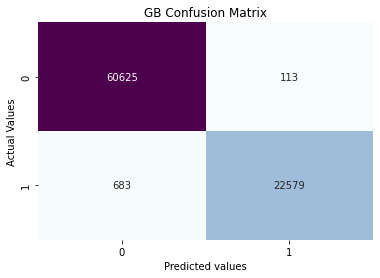

In [268]:
print('GB classifier Train Accuracy Score: ', accuracy_score(y_train, ytrain_pred_gb))
print('******************************************************************************')
cm_gb = my_confusion_matrix(y_train, ytrain_pred_gb, 'GB Confusion Matrix')

GB classifier test Accuracy Score:  0.8976190476190476
******************************************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     15158
         1.0       0.84      0.78      0.81      5842

    accuracy                           0.90     21000
   macro avg       0.88      0.86      0.87     21000
weighted avg       0.90      0.90      0.90     21000



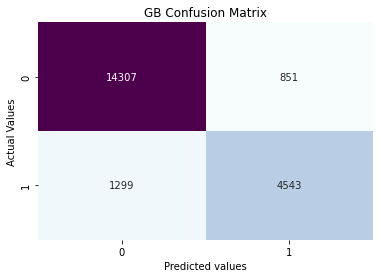

In [269]:
print('GB classifier test Accuracy Score: ', accuracy_score(y_test, ytest_pred_gb))
print('******************************************************************************')
cm_gb = my_confusion_matrix(y_test, ytest_pred_gb, 'GB Confusion Matrix')

# Grid Search

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [271]:
# param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
# gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
# param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
# gsearch2.fit(X_train, y_train)


In [272]:
# gsearch2.best_params_

In [273]:
# gsearch2.best_score_

In [274]:
# ytrain_pred_ = gsearch2.predict(X_train)
# ytest_pred_ =gsearch2.predict(X_test)

In [275]:
# print('GBGrid classifier Train Accuracy Score: ', accuracy_score(y_train, ytrain_pred_))
# print('******************************************************************************')
# cm_gbgs = my_confusion_matrix(y_train, ytrain_pred_, 'GBGrid Confusion Matrix')   

In [276]:
# print('GBGird classifier Test Accuracy Score: ', accuracy_score(y_test, ytest_pred_))
# print('******************************************************************************')
# cm_gsgb = my_confusion_matrix(y_test, ytest_pred_, 'GBGrid Confusion Matrix')

In [277]:
testing_data  = pd.read_csv('D:/Wilson Analytics -Mega Hackathon_Dec2022/testing_data.csv')

In [278]:
df3 = testing_data.copy()

In [279]:
# df3.head()

In [280]:
df3 = df3.drop(['ID','Date_Of_Disbursement','ChargedOff_Amount ','Gross_Amount_Balance','Borrower_Name ','Commitment_Date','Year_Of_Commitment ','State_Of_Bank','Borrower_City','Borrower_State','Classification_Code ','Commitment_Date','Code_Franchise','Name_Of_Bank'],axis=1)

In [281]:
df3['Guaranteed_Approved _Loan'] = df3['Guaranteed_Approved _Loan'].str.replace('Rs.','').astype('float')
df3['Loan_Approved_Gross'] = df3['Loan_Approved_Gross'].str.replace(',','').str.replace('Rs.','').astype('float')
df3['Gross_Amount_Disbursed  '] = df3['Gross_Amount_Disbursed  '].str.replace(',','').str.replace('Rs.','').astype('float')

In [282]:
# df3.info()

In [283]:
for column in df3.columns:
    if df3[column].dtype == 'object':
        column.upper(),': ',df3[column].nunique()
        df3[column].value_counts().sort_values()
        #print('\n')

In [284]:
df3['Business']=np.where(df3['Business'] =='0', 'Existing', df3['Business'])

In [285]:
df3['Low_Documentation_Loan']=np.where(df3['Low_Documentation_Loan'] =='R' , 'Yes', df3['Low_Documentation_Loan'])
df3['Low_Documentation_Loan']=np.where(df3['Low_Documentation_Loan'] =='A' , 'Yes', df3['Low_Documentation_Loan'])
df3['Low_Documentation_Loan']=np.where(df3['Low_Documentation_Loan'] =='C' , 'Yes', df3['Low_Documentation_Loan'])
df3['Low_Documentation_Loan']=np.where(df3['Low_Documentation_Loan'] =='S' , 'Yes', df3['Low_Documentation_Loan'])
df3['Low_Documentation_Loan']=np.where(df3['Low_Documentation_Loan'] =='0' , 'Yes', df3['Low_Documentation_Loan'])

In [286]:
df3['Demography'] = np.where(df3['Demography'] =='Undefined', 'Urban', df3['Demography'])

In [287]:
df3['Business'] = df3['Business'].fillna(df3['Business'].mode()[0],axis=0)
df3['Low_Documentation_Loan'] = df3['Low_Documentation_Loan'].fillna(df3['Low_Documentation_Loan'].mode()[0],axis=0)
df3['Revolving_Credit_Line'] = df3['Revolving_Credit_Line'].fillna(df3['Revolving_Credit_Line'].mode()[0],axis=0)

In [288]:
# df3.isnull().sum()

In [289]:
for feature in df3.columns: 
    if df3[feature].dtype == 'object': 
        #print('\n')
        #print('feature:',feature)
        pd.Categorical(df3[feature].unique())
        pd.Categorical(df3[feature].unique()).codes
        df3[feature] = pd.Categorical(df3[feature]).codes

In [290]:
# df1.head()

In [291]:
# df1.columns

In [292]:
df3 = df3[['Jobs_Reatained', 'Jobs_Created ', 'Count_Employees', 'Loan_Term',
       'Guaranteed_Approved _Loan', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Business', 'Low_Documentation_Loan',
       'Demography', 'Revolving_Credit_Line']]

In [293]:
# df3.head()

In [294]:
pred = gsearch2.predict(df3)

In [295]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [296]:
testing_data['Default'] = pred

In [297]:
testing_data.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,...,326199,Rs.8128000.0,Rs.9403852.16,57,09-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes,0.0
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,...,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No,0.0
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,...,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes,0.0
3,105003,31-Jul-00,New,2,0,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,...,0,Rs.4064000.0,Rs.6916196.48,18,28-Jun-00,3814664008,1,Aryavart Bank,Yes,0.0
4,105004,30-Jun-05,Existing,0,0,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,...,441310,Rs.31292800.0,Rs.31292800.0,219,02-May-05,8830244003,1,Paschim Banga Gramin Bank,No,0.0


In [298]:
result = testing_data[['ID','Default']]

In [299]:
result.to_csv('D:/Wilson Analytics -Mega Hackathon_Dec2022/Submission.csv',index = False)

In [300]:
# df4 = pd.read_csv('D:/Wilson Analytics -Mega Hackathon_Dec2022/Submission.csv')

In [301]:
# df4.head()